<a href="https://colab.research.google.com/github/umSamWeiHong/DepressionModel/blob/master/DepressionIndicator_Wei_Hong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some random text


In [260]:
# !pip install tensorflow-gpu

In [261]:
# !nvidia-smi

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

In [264]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


In [265]:
from collections import Counter
X = df
y = df['DASS_depression_severity']

X = X.drop(columns='DASS_depression_severity')
print(Counter(y))

Counter({0: 201, 1: 49, 2: 37, 3: 16, 4: 13})


In [266]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy={0: 201, 1: 50, 2: 50, 3: 30, 4: 30})
X, y = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y)}")

Oversampled: Counter({0: 201, 2: 50, 1: 50, 3: 30, 4: 30})


In [267]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy={0: 100, 1: 50, 2: 50, 3: 30, 4: 30})
X, y = under.fit_resample(X, y)
print(f"Combined Random Sampling: {Counter(y)}")

Combined Random Sampling: Counter({0: 100, 1: 50, 2: 50, 3: 30, 4: 30})


One hot encoding for categorical data

In [268]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X[['Alone','Friends/Coursemates','Family']] = ohe.fit_transform(X['Living_with1'].values.reshape(-1,1))
X[['< RM1000','RM1000 - 3000','> RM3000']] = ohe.fit_transform(X['Expenses'].values.reshape(-1,1))
y = ohe.fit_transform(y.values.reshape(-1,1))

X = X.drop(columns=['Living_with1','Expenses'])
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

Remove unnecessary columns (features):

In [269]:
print(df.columns)
df.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity',
                #  'Religion_binary','Med_or_not',
                 ],
        inplace=True, axis=1)
print(df.columns)

Index(['Code', 'Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Expenses',
       'Monthly_expenses', 'Living_with1', 'Living_with', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medical_illness', 'Mental_illness', 'COVID_symptoms',
       'Residence_high_COVID1', 'Residence_high_COVID', 'Quarantine',
       'DASS_depression_numerical', 'DASS_anxiety_numerical',
       'DASS_stress_numerical', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others', 'DASS_depression_binary',
       'DASS_depression_severity', 'DASS_anxiety_binary',
       'DASS_anxiety_severity', 'DASS_stress_binary', 'DASS_stress_severity'],
      dtype='object')
Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Expenses',
       'Living_with1', 'Worry_family', 'Routine_loss', 'Class_hours',
       'Stress_class_disrupted', 'Med

Split the dataset into the training set and test set

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(182, 37) (182, 5)
(78, 37) (78, 5)


Call the method below for feature normalisation (for numerical values):

In [271]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['Age_Numerical', 'Class_hours', 'MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder='passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct.get_feature_names_out()

Use feature normalisation:

In [272]:
X_train_scaled, X_test_scaled, features = featureNormalisation()

Neural network (Deep learning):

In [309]:
!pip install -q -U keras-tuner

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import kerastuner as kt
tf.keras.backend.clear_session()

def model_builder(hp):
  model = Sequential()
  activation = hp.Choice('activation', values=['relu','elu','tanh'])
  # activation = 'relu'
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])  
  hp_units1 = hp.Int('units1', min_value=1, max_value=100, step=2)
  hp_units2 = hp.Int('units2', min_value=1, max_value=100, step=2)
  model.add(Dense(units=X.shape[1], activation=activation))
  model.add(Dense(units=hp_units1, activation=activation))
  model.add(keras.layers.Dropout(0.2)) 
  model.add(Dense(units=hp_units2, activation=activation, kernel_regularizer=keras.regularizers.l1()))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
  # model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

# def model_builder(hp):
#   model = Sequential()
#   activation = 'relu'
#   hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  
#   hp_units1 = hp.Int('units1', min_value=1, max_value=50, step=1)
#   # hp_units2 = hp.Int('units2', min_value=1, max_value=50, step=1)
#   # hp_units3 = hp.Int('units3', min_value=1, max_value=50, step=1)
#   hp_dropout1 = hp.Float('dropout1', min_value=0, max_value=0.4)
#   model.add(Dense(units=25, activation=activation))
#   model.add(Dense(units=hp_units1, activation=activation))
#   # model.add(Dense(units=hp_units2, activation=activation))
#   model.add(keras.layers.Dropout(hp_dropout1))
#   # model.add(Dense(units=hp_units3, activation=activation))    
#   model.add(Dense(5, activation='softmax'))

#   model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                 loss=keras.losses.CategoricalCrossentropy(),
#                 metrics=['accuracy'])
#   return model

In [438]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='keras-tuning',
                     overwrite=True)
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 2, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 2, 'sampling': None}


In [439]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Perform hypertuning
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 02s]
val_accuracy: 0.5675675868988037

Best val_accuracy So Far: 0.9189189076423645
Total elapsed time: 00h 00m 51s
INFO:tensorflow:Oracle triggered exit


In [459]:
best_hps=tuner.get_best_hyperparameters()[0]
h_model = tuner.hypermodel.build(best_hps)
history = h_model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 1s 45ms/step - loss: 14.9028 - accuracy: 0.1862 - val_loss: 11.8491 - val_accuracy: 0.4054
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 9.5816 - accuracy: 0.3724 - val_loss: 6.9125 - val_accuracy: 0.2162
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 6.8982 - accuracy: 0.2759 - val_loss: 5.7712 - val_accuracy: 0.4865
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 5.8079 - accuracy: 0.5103 - val_loss: 5.2257 - val_accuracy: 0.5405
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 5.1920 - accuracy: 0.4897 - val_loss: 4.7471 - val_accuracy: 0.5405
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 4.7092 - accuracy: 0.6138 - val_loss: 4.2044 - val_accuracy: 0.7568
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 4.3012 - accuracy: 0.5793 - val_loss: 3.7297 - val_accuracy: 0.9189
Epoch 8/200
5/5 [=====

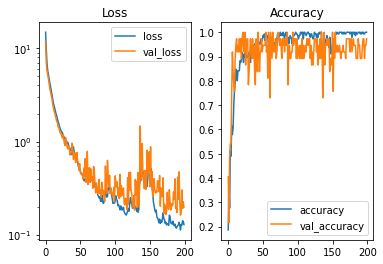

In [462]:
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale('log')
plt.legend(['loss', 'val_loss'])

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

In [463]:
h_model.evaluate(X_test_scaled, y_test, return_dict=True)

3/3 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8846


{'accuracy': 0.8846153616905212, 'loss': 0.41696617007255554}